In [16]:
 import pandas as pd
 student_dataset = pd.read_csv('student_dataset.csv')
 student_dataset.head()

,Student_Names,Math,Physics,Chemistry,Grade,Comment,Average attendance on class,Roll No.
0,Donald Contreras,76.0,84.0,54.0,B+,Good Pursuance,90,524613.0
1,Joseph Horton,91.0,75.0,78.0,A,Very Good Achivement,96,561635.0
2,Savannah Burns MD,64.0,98.0,20.0,C,Below Average Achivement,80,560985.0
3,William Carter,15.0,95.0,32.0,D,Poor Pursuance,88,535126.0
4,John Rodriguez,86.0,86.0,66.0,B+,Good Pursuance,80,559410.0


In [20]:
student_dataset.tail(600)

,Student_Names,Math,Physics,Chemistry,Grade,Comment,Average attendance on class,Roll No.
594,David Proctor,81.0,79.0,74.0,B+,Good Pursuance,100,516906.0
595,Kathy Brown,37.0,69.0,91.0,B,Average Performance,99,514756.0
596,Michael Lucas,60.0,97.0,66.0,B+,Good Pursuance,100,532621.0
597,Carrie Howell,79.0,65.0,74.0,B+,Good Pursuance,75,585388.0
598,James Smith,16.0,71.0,58.0,D,Poor Pursuance,80,566773.0
...,...,...,...,...,...,...,...,...
1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
!pip install matplotlib scikit-learn

In [78]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

student_dataset = pd.read_csv('student_dataset.csv')

grade_mapping = {'A+': 4.0, 'A': 4.0, 'A-': 3.7, 'B+': 3.3, 'B': 3.0, 'B-': 2.7, 'C+': 2.3, 'C': 2.0, 'C-': 1.7, 'D+': 1.3, 'D': 1.0, 'F': 0.0}

student_dataset['Grade'] = student_dataset['Grade'].map(grade_mapping)

def convert_attendance_to_average(attendance_range):
    try:
        if '-' in attendance_range:
            start, end = map(float, attendance_range.split('-'))
            return (start + end) / 2
        else:
            return float(attendance_range)
    except (ValueError, TypeError):
        return float('nan')

student_dataset['Average attendance on class'] = student_dataset['Average attendance on class'].apply(convert_attendance_to_average)

features = student_dataset[['Grade', 'Average attendance on class']]

features = features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [83]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

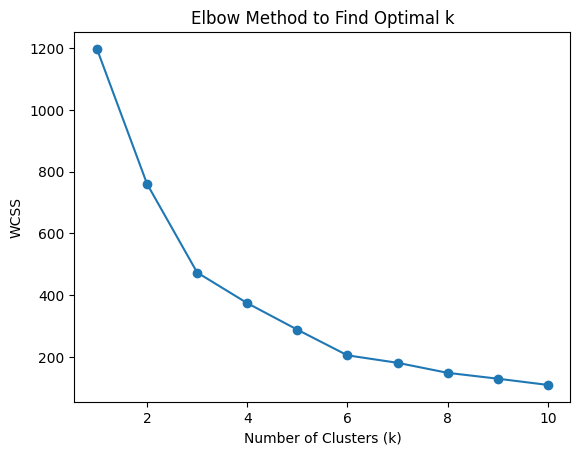

In [84]:
 plt.plot(range(1, 11), wcss, marker='o')
 plt.xlabel('Number of Clusters (k)')
 plt.ylabel('WCSS')
 plt.title('Elbow Method to Find Optimal k')
 plt.show()

# New Section

In [94]:
kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(scaled_features)

cluster_df = pd.DataFrame({'Cluster': clusters}, index=features.index)

student_dataset = student_dataset.merge(cluster_df, left_index=True, right_index=True, how='left')

print(student_dataset.columns)

Index(['Student_Names', 'Math', 'Physics', 'Chemistry', 'Grade', 'Comment',
       'Average attendance on class', 'Roll No.', 'Cluster_x', 'Cluster_y',
       'Cluster'],
      dtype='object')


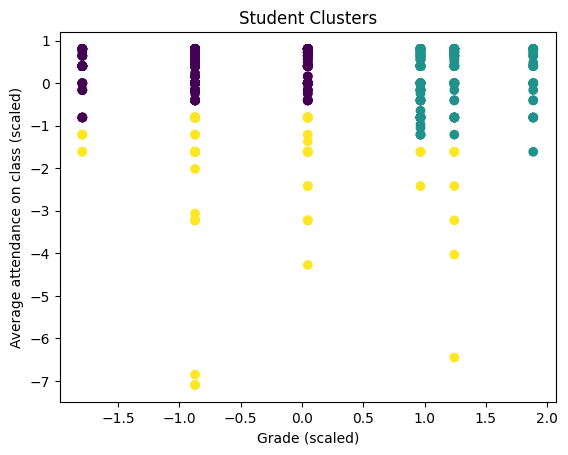

In [98]:
student_dataset_filtered = student_dataset[student_dataset.index.isin(features.index)]
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=student_dataset_filtered['Cluster'], cmap='viridis')
plt.xlabel('Grade (scaled)')
plt.ylabel('Average attendance on class (scaled)')
plt.title('Student Clusters')
plt.show()

In [105]:
student_dataset[['Grade', 'Average attendance on class', 'Cluster']].head()

,Grade,Average attendance on class,Cluster
0,3.3,90.0,1.0
1,4.0,96.0,1.0
2,2.0,80.0,2.0
3,1.0,88.0,0.0
4,3.3,80.0,1.0


In [106]:
student_dataset

,Student_Names,Math,Physics,Chemistry,Grade,Comment,Average attendance on class,Roll No.,Cluster_x,Cluster_y,Cluster
0,Donald Contreras,76.0,84.0,54.0,3.3,Good Pursuance,90.0,524613.0,1.0,1.0,1.0
1,Joseph Horton,91.0,75.0,78.0,4.0,Very Good Achivement,96.0,561635.0,1.0,1.0,1.0
2,Savannah Burns MD,64.0,98.0,20.0,2.0,Below Average Achivement,80.0,560985.0,2.0,2.0,2.0
3,William Carter,15.0,95.0,32.0,1.0,Poor Pursuance,88.0,535126.0,0.0,0.0,0.0
4,John Rodriguez,86.0,86.0,66.0,3.3,Good Pursuance,80.0,559410.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
student_dataset.to_csv('students_dataset_with_clusters.csv', index=False)

In [111]:
!pip install joblib
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [114]:
df = pd.read_csv("students_dataset_with_clusters.csv")
df

,Student_Names,Math,Physics,Chemistry,Grade,Comment,Average attendance on class,Roll No.,Cluster_x,Cluster_y,Cluster
0,Donald Contreras,76.0,84.0,54.0,3.3,Good Pursuance,90.0,524613.0,1.0,1.0,1.0
1,Joseph Horton,91.0,75.0,78.0,4.0,Very Good Achivement,96.0,561635.0,1.0,1.0,1.0
2,Savannah Burns MD,64.0,98.0,20.0,2.0,Below Average Achivement,80.0,560985.0,2.0,2.0,2.0
3,William Carter,15.0,95.0,32.0,1.0,Poor Pursuance,88.0,535126.0,0.0,0.0,0.0
4,John Rodriguez,86.0,86.0,66.0,3.3,Good Pursuance,80.0,559410.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
print(df.isnull().sum())
df = df.dropna()

Student_Names                  0
Math                           0
Physics                        0
Chemistry                      0
Grade                          0
Comment                        0
Average attendance on class    0
Roll No.                       0
Cluster_x                      0
Cluster_y                      0
Cluster                        0
dtype: int64


In [123]:
X = df[['Grade', 'Average attendance on class']]
y = df['Roll No.']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
 model = RandomForestRegressor(n_estimators=100, random_state=42)
 model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [129]:
 y_pred = model.predict(X_test)
 mae = mean_absolute_error(y_test, y_pred)
 mse = mean_squared_error(y_test, y_pred)
 rmse = np.sqrt(mse)
 r2 = r2_score(y_test, y_pred)
 print(f"Mean Absolute Error: {mae}")
 print(f"Mean Squared Error: {mse}")
 print(f"Root Mean Squared Error: {rmse}")
 print(f"R² Score: {r2}")

Mean Absolute Error: 27571.628114921754
Mean Squared Error: 1062611893.0773987
Root Mean Squared Error: 32597.728342284816
R² Score: -0.28882298049378874


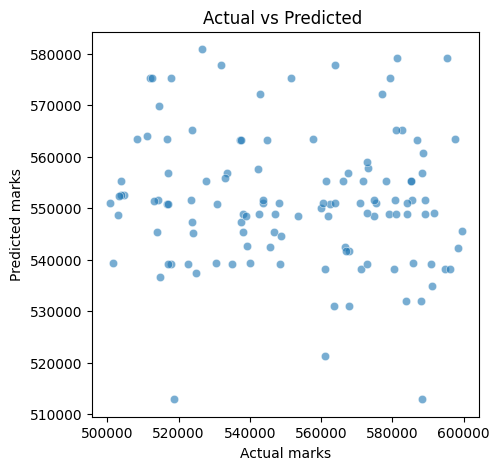

In [140]:
 plt.figure(figsize=(5, 5))
 sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
 plt.xlabel("Actual marks")
 plt.ylabel("Predicted marks")
 plt.title("Actual vs Predicted ")
 plt.show()

In [141]:
 joblib.dump(model, "student_dataset_model.pkl")

['student_dataset_model.pkl']